In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin1')

In [4]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [5]:
df.to_csv('spam.csv',encoding = 'utf-8')

In [10]:
df.loc[184]

v1                                   ham
v2            Going on nothing great.bye
Unnamed: 2                           NaN
Unnamed: 3                           NaN
Unnamed: 4                           NaN
Name: 184, dtype: object

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4007,ham,"Forgot you were working today! Wanna chat, but...",NaN,NaN,NaN
5298,ham,I.ll hand her my phone to chat wit u,NaN,NaN,NaN
193,ham,It will stop on itself. I however suggest she ...,NaN,NaN,NaN
2429,spam,Guess who am I?This is the first time I create...,NaN,NaN,NaN
4274,ham,Haiyoh... Maybe your hamster was jealous of mi...,NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

In [15]:
#steps - data clean -> EDA -> text processing -> Model building -> evaluation -> Improvement -> website -> deploy

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# drop last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [18]:
df.sample(5)

,v1,v2
2377,spam,YES! The only place in town to meet exciting a...
705,ham,I don't think I can get away for a trek that l...
1218,ham,K..k..i'm also fine:)when will you complete th...
1543,spam,Hello from Orange. For 1 month's free access t...
2744,ham,"Tick, tick, tick ... Babe"


In [19]:
# rename 
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
2266,spam,<Forwarded from 88877>FREE entry into our å£25...
3254,ham,HI ITS KATE CAN U GIVE ME A RING ASAP XXX
132,ham,First answer my question.
3612,ham,Depends on individual lor e hair dresser say p...
2157,ham,Sad story of a Man - Last week was my b'day. M...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['target'] = encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#checking duplicate as there are no null as seen in info
df.duplicated().sum()

403

In [24]:
df = df.drop_duplicates(keep = 'first')

In [25]:
df.duplicated().sum()

0

In [26]:
#let's perform EDA

In [27]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

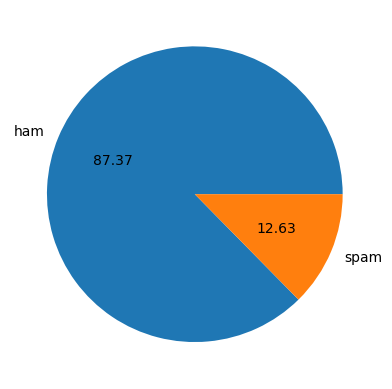

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [29]:
# => data is imbalanced

In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RIYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

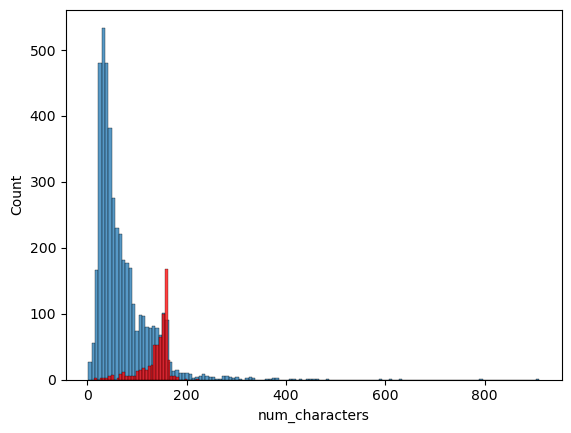

In [41]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

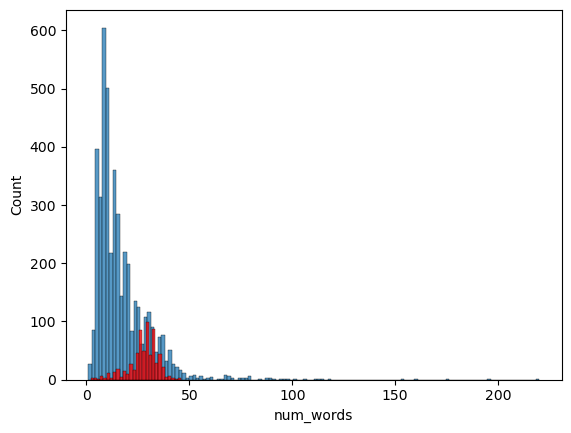

In [42]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

C:\Users\RIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


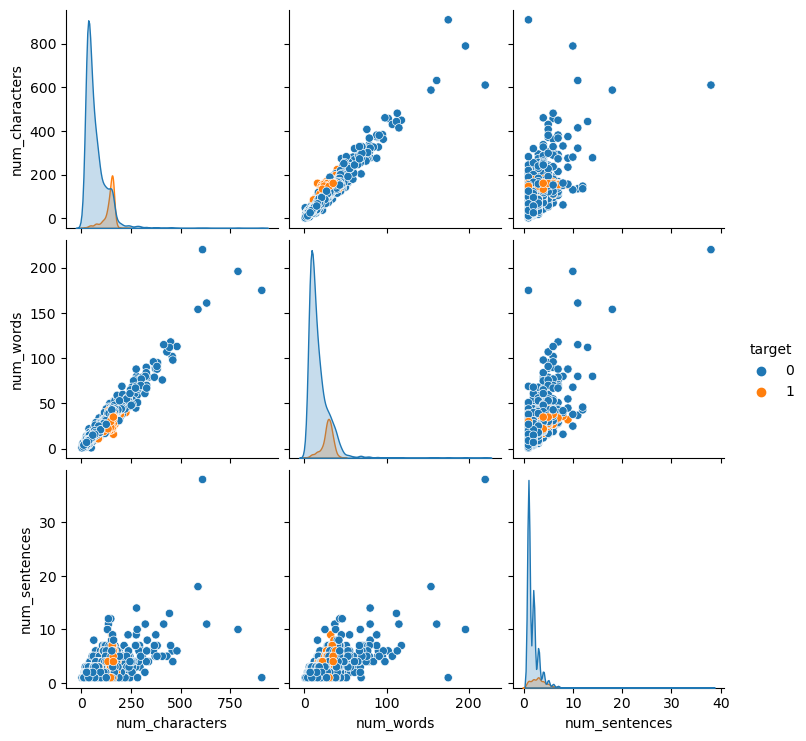

In [44]:
sns.pairplot(df, hue = 'target')

In [51]:
numeric_df = df[['target','num_characters', 'num_words', 'num_sentences']]

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


<Axes: >

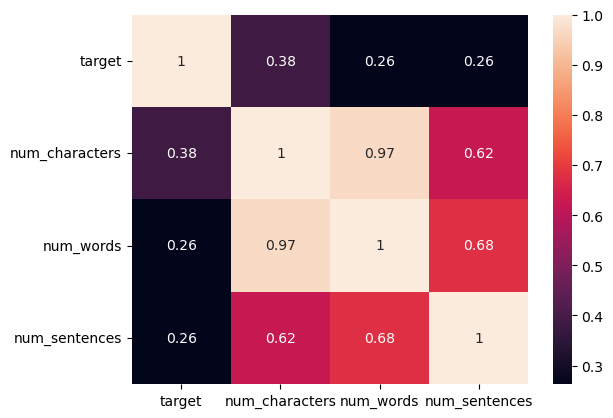

In [52]:
sns.heatmap(correlation_matrix, annot = True)

In [53]:
# => there is strong correlation between num_char, sent, words so will choose char to avoid multicolinearity

In [54]:
# let's do data preprocessing

In [55]:
# steps- lowercase -> tokenization -> removing special charachter -> remove stop words and punctuation -> stemming

In [67]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [58]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [59]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [66]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
df['transformed_text'] = df['text'].apply(transform_text)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [75]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

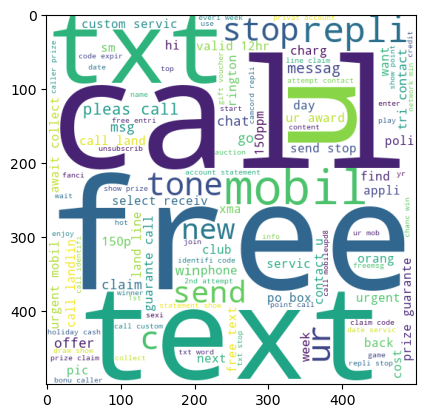

In [77]:
plt.imshow(spam_wc)

In [78]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

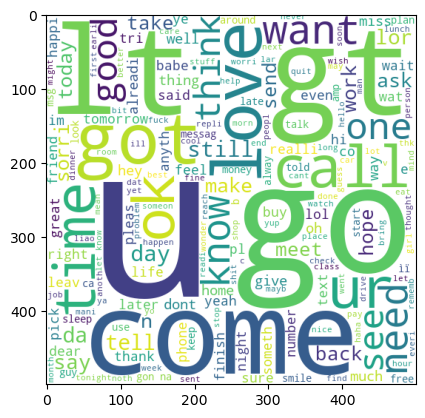

In [79]:
plt.imshow(ham_wc)

In [71]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [80]:
# we can see which word comes maximum

In [81]:
# now let's build model

In [96]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [83]:
cv = CountVectorizer()

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
X.shape

(5169, 3000)

In [100]:
y = df['target'].values


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [103]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [104]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [107]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [108]:
# mnb is the best

In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))